# Домашня робота №7

# Перетворення випадкових величин

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1 Квантильне перетворення

### 1.1 Задана щільність

Нехай випадкова величина $\xi$ має щільність
$f(x) = a \sin(x) I_{[0, \pi]}(x),$
де $I_{[c, d]}(x)$ - індикатор на відрізку $[c, d]$.

Знайдіть значення параметра $a$.

Згенеруйте $n = 100000$ значень випадкової величини $\xi$ за допомогою квантильного перетворення.

Намалюйте нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi$ разом з її функцією щільності.

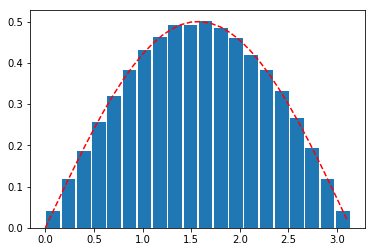

In [2]:
# Місце для Вашого коду

from scipy.stats import uniform

a = 1/2    # integral a sin(x) dx, x from 0 to pi = 1 


def inv_func(y):
    return np.arcsin(y / a) + np.pi / 2


rv = uniform(-0.5, 1)    # why it's must be from -0.5?
random = inv_func(rv.rvs(100_000))

x = np.arange(0, np.pi, 0.1)

plt.hist(random, density=True, bins=20, rwidth=0.9)
plt.plot(x, a * np.sin(x), 'r--')
plt.show()

### 1.2 Нормальний розподіл

Нехай випадкова величина $\xi \sim N(0, 1)$.

Згенеруйте $n = 100000$ значень випадкової величини $\xi$ за допомогою квантильного перетворення.

Намалюйте нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi$ разом з її функцією щільності.

[ 2.52669284  1.07764185 -0.63513485 ... -0.94338123 -2.01298035
  1.01091968]


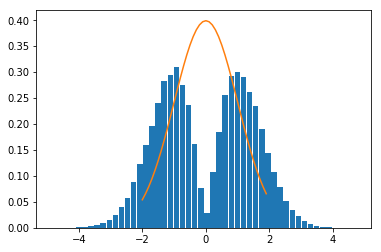

In [3]:
# Місце для Вашого коду

from scipy.stats import norm
from random import choice


def inv_norm(y):
    tmp = np.sqrt(2 * np.pi)
    res = np.sqrt(-2 * np.log(tmp * y))
    if getattr(y, '__iter__', None) is not None:
        for i, el in enumerate(res):
            sign = choice([-1, 1])
            res[i] = sign * el
    else:
        res *= choice([-1, 1])
    return res


rv = uniform(0, 0.3989422804014327)         # 1 / sqrt(2pi)
random = inv_norm(rv.rvs(100_000))
x = np.arange(-2, 2, 0.1)
print(random)
plt.hist(random, density=True, bins=50, rwidth=0.9)
plt.plot(x, norm.pdf(x))
plt.show()

## 2 Відсутність пам'яті

Розглянемо випадкову величину $\xi$ з геометричного розподілу з параметром $p = 0.5$.
Тобто $\xi \sim Geom(0.5)$.

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію ймовірностей випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = (\xi - 1) I_{(\xi - 1) > 0}$;
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих значень випадкової величини $\eta$;
   - функцію ймовірностей випадкової величини $\xi$.

**Зауваження 1.** Графік функції ймовірнстей краще малювати для $10$ значень.

**Зауваження 2.** У гістограмах проміжок значень слід розбивати на одиничні інтервали.

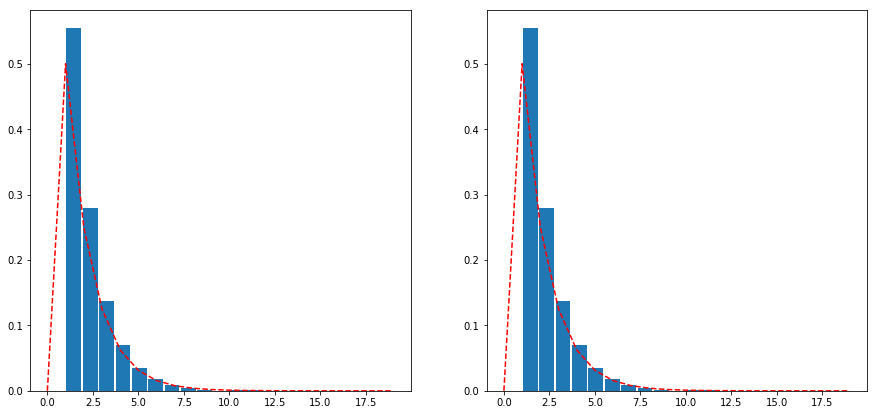

In [4]:
# Місце для Вашого коду

from scipy.stats import geom

rv = geom(0.5)

def func(x):
    res = x - 1
    if getattr(res, '__iter__', None) is not None:
        for i, el in enumerate(res):
            if el < 0:
                res[i] = 0
    else:
        res = 0 if res < 0 else res
    return res


random = rv.rvs(100_000)
x = np.arange(0, 20, 1)

fig, axs = plt.subplots(1, 2, figsize=(15, 7))
axs[0].hist(random, bins=20, density=True, rwidth=0.9)
axs[0].plot(x, rv.pmf(x), 'r--')

eta_random = func(random)
axs[1].hist(random, bins=20, density=True, rwidth=0.9)
axs[1].plot(x, rv.pmf(x), 'r--')

## 3 Задача 1.11.3

Розглянемо випадкову величину $\xi$ зі стандартного експоненційного розподілу.
Тобто $\xi \sim Exp(1)$.

### 3.1 Експонента

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = \exp\{-\xi\}$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

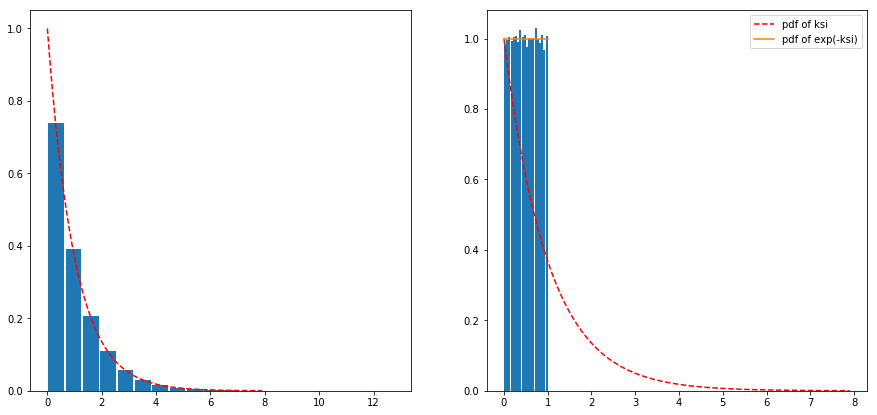

In [5]:
# Місце для Вашого коду

from scipy.stats import expon

rv = expon()

random = rv.rvs(100_000)
x = np.arange(0, 8, 0.1)

fig, axs = plt.subplots(1, 2, figsize=(15, 7))
axs[0].hist(random, bins=20, density=True, rwidth=0.9)
axs[0].plot(x, rv.pdf(x), 'r--')

axs[1].hist(np.exp(-random), bins=20, density=True, rwidth=0.9)
axs[1].plot(x, rv.pdf(x), 'r--', label='pdf of ksi')
axs[1].plot(np.arange(0, 2), [1, 1], label='pdf of exp(-ksi)')
plt.legend(loc='best')
plt.show()


### 3.2 Квадрат

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = \xi^2$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

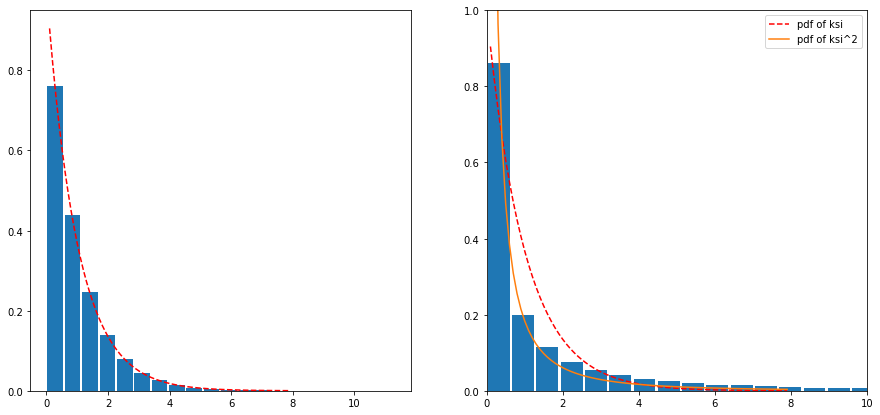

In [6]:
# Місце для Вашого коду

rv = expon()

random = rv.rvs(100_000)
x = np.arange(0.1, 8, 0.1)

fig, axs = plt.subplots(1, 2, figsize=(15, 7))
axs[0].hist(random, bins=20, density=True, rwidth=0.9)
axs[0].plot(x, rv.pdf(x), 'r--')

axs[1].hist(random ** 2, bins=200, density=True, rwidth=0.9)
axs[1].plot(x, rv.pdf(x), 'r--', label='pdf of ksi')
axs[1].plot(x, np.exp(-np.sqrt(x)) / (2 * x), label='pdf of ksi^2')
axs[1].set_ylim(0, 1)
axs[1].set_xlim(0, 10)
plt.legend(loc='best')
plt.show()


## 4 Задача 1.11.5

Розглянемо випадкову величину $\xi$ зі стандартного рівномірного розподілу.
Тобто $\xi \sim Unif(0, 1)$.

### 4.1 Лінійне перетворення

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = 3 \xi - 2$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

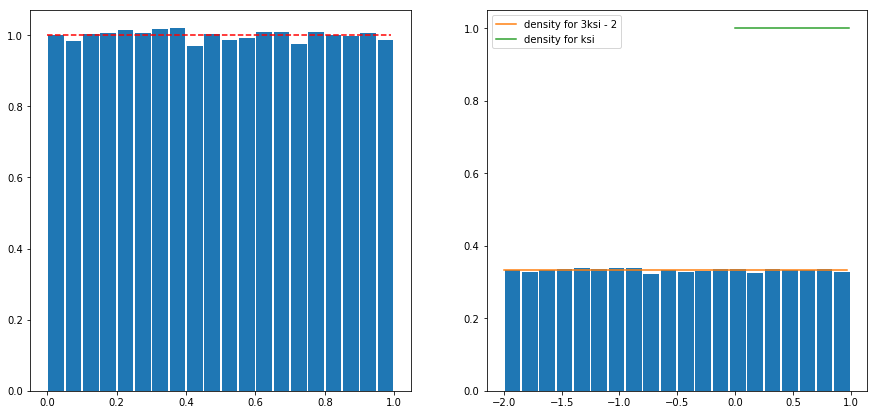

In [7]:
# Місце для Вашого коду

rv = uniform(0, 1)

random = rv.rvs(100_000)
x = np.arange(0, 1, 0.01)

fig, axs = plt.subplots(1, 2, figsize=(15, 7))
axs[0].hist(random, bins=20, density=True, rwidth=0.9)
axs[0].plot(x, rv.pdf(x), 'r--')

axs[1].hist(3*random - 2, bins=20, density=True, rwidth=0.9)
axs[1].plot(3*x - 2, rv.pdf((x + 2) / 3) / 3, label='density for 3ksi - 2')
axs[1].plot(x, rv.pdf(x), label='density for ksi')
plt.legend(loc='best')

plt.show()

### 4.2 Модуль від лінійного перетворення

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = |2 \xi - 1|$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

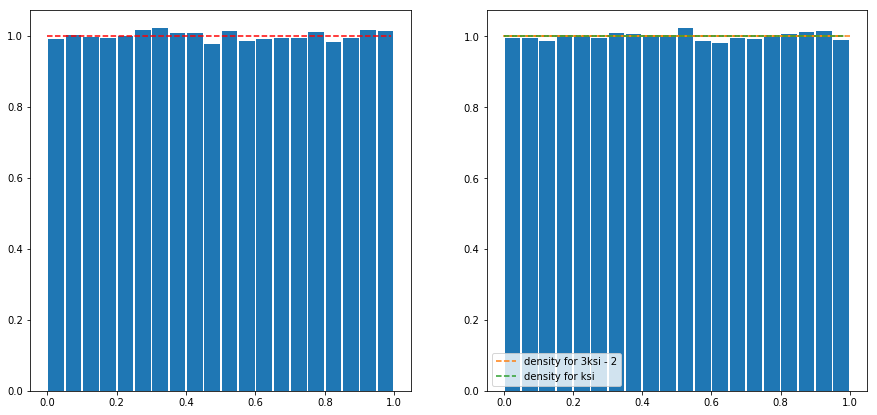

In [8]:
# Місце для Вашого коду

rv = uniform(0, 1)

random = rv.rvs(100_000)
x = np.arange(0, 1, 0.01)

fig, axs = plt.subplots(1, 2, figsize=(15, 7))
axs[0].hist(random, bins=20, density=True, rwidth=0.9)
axs[0].plot(x, rv.pdf(x), 'r--')

axs[1].hist(np.abs(2*random - 1), bins=20, density=True, rwidth=0.9)
axs[1].plot(np.abs(2*x - 1), rv.pdf((x + 1) / 2) + rv.pdf(-(x + 1) / 2), '--', label='density for 3ksi - 2')
axs[1].plot(x, rv.pdf(x), '--', label='density for ksi')
plt.legend(loc='best')

plt.show()


### 4.3 Логарифм

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = - \log \xi$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

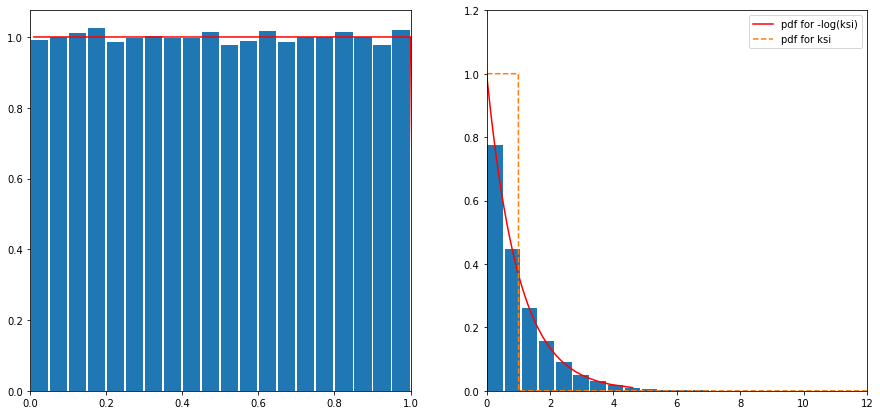

In [25]:
# Місце для Вашого коду

rv = uniform(0, 1)

random = rv.rvs(100_000)
x = np.arange(0.01, 12, 0.01)

fig, axs = plt.subplots(1, 2, figsize=(15, 7))
axs[0].hist(random, bins=20, density=True, rwidth=0.9)
axs[0].plot(x, rv.pdf(x), 'r')
axs[0].set_xlim(0, 1)

axs[1].hist(-np.log(random), bins=20, density=True, rwidth=0.9)
axs[1].plot(-np.log(x), x * rv.pdf(np.exp(-x)), 'r', label='pdf for -log(ksi)')
axs[1].plot(x, rv.pdf(x), '--', label='pdf for ksi')
axs[1].set_xlim(0, 12)
axs[1].set_ylim(0, 1.2)
plt.legend(loc='best')
plt.show()

## 5 Одиничний квадрат

Реалізуйте вадкову величину рівномірно розподілену на одиничному квадраті.
Тобто $\xi = (x, y), \quad x, y \sim Unif(0, 1)$.

In [10]:
# Місце для Вашого коду

rv = (uniform(0, 1), uniform(0, 1))

Знайдіть функцію щільності випадкової величини $\xi_1 = x^2 + y^2$.
Намалюйте її разом із нормованою гістограмою $n = 100000$ значень випадкової величини $\xi_1$,
отриманою перетвореннями випадкових величин $x, y$.

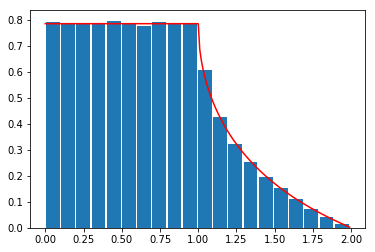

In [7]:
# Місце для Вашого коду

from scipy.stats import uniform

random = uniform(0, 1).rvs(100_000) ** 2 + uniform(0, 1).rvs(100_000) ** 2
x = np.arange(0, 2, 0.01)


def _tmp_func(x: float):
    
    res = np.pi / 4 if 0 <= x <= 1 else 0
    res += (np.pi/4 - np.arccos(1 / np.sqrt(x)) + 1 / (2 * np.sqrt(x - 1))) if 1 < x <= 2 else 0
    res -= 1 / (2 * np.sqrt(x - 1)) if 1 < x <= 2 else 0
    return res


def function(x):
    if hasattr(x, '__iter__'):
        return np.array([_tmp_func(tmp) for tmp in x])
    else:
        return _tmp_func(x) 

    
plt.hist(random, bins=20, density=True, rwidth=0.9)
plt.plot(x, function(x), 'r')
plt.show()

Знайдіть функцію щільності випадкової величини $\xi_2 = \max (x, y)$.
Намалюйте її разом із нормованою гістограмою $n = 100000$ значень випадкової величини $\xi_2$,
отриманою перетвореннями випадкових величин $x, y$.

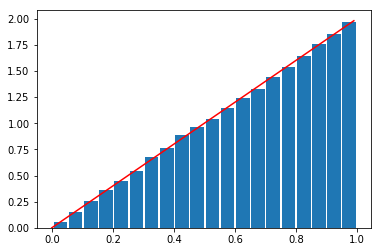

In [22]:
# Місце для Вашого коду

random = np.array([max(a, b) for a, b in zip(uniform.rvs(0, 1, 100_000), uniform.rvs(0, 1, 100_000))])
x = np.arange(0, 1, 0.01)

plt.hist(random, bins=20, density=True, rwidth=0.9)
plt.plot(x, 2*x, 'r')
plt.show()

Знайдіть функцію щільності випадкової величини $\xi_3 = |x - y|$.
Намалюйте її разом із нормованою гістограмою $n = 100000$ значень випадкової величини $\xi_3$,
отриманою перетвореннями випадкових величин $x, y$.

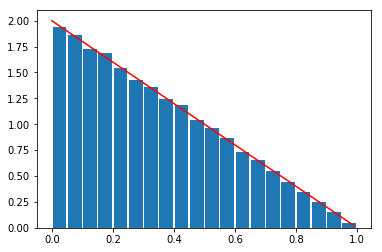

In [29]:
# Місце для Вашого коду

random = np.array([abs(a - b) for a, b in zip(uniform.rvs(0, 1, 100_000), uniform.rvs(0, 1, 100_000))])
x = np.arange(0, 1, 0.01)

plt.hist(random, bins=20, density=True, rwidth=0.9)
plt.plot(x, 2 - 2*x, 'r')
plt.show()